In [123]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# Read google drive file
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [125]:
pd.set_option('display.max_rows', None)

random_state = 100
np.random.seed(random_state)

In [126]:
df = pd.read_csv('/content/gdrive/MyDrive/Project - Real Estate/feature-engineering.csv')

In [127]:
df.duplicated().sum()

0

In [128]:
df.shape

(3765, 31)

In [129]:
df.columns

Index(['property_name', 'property_type', 'link', 'sector', 'society', 'price', 'area', 'price_per_sqft', 'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'address', 'floorNum', 'facing', 'agePossession', 'nearbyLocations', 'description', 'furnishDetails', 'rating', 'property_id', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type'], dtype='object')

<ipython-input-130-ea43129b75a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

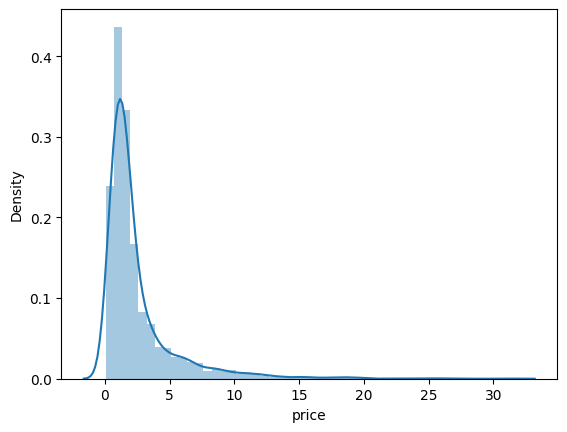

In [130]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

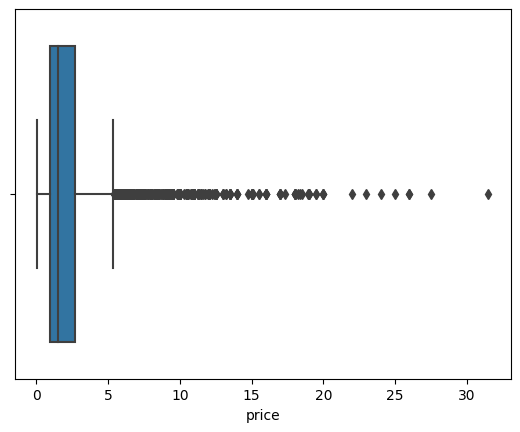

In [131]:
sns.boxplot(x=df['price'])

In [132]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(422,
 count    422.000000
 mean       9.223294
 std        4.090656
 min        5.400000
 25%        6.400000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [133]:
outliers.sort_values('price',ascending=False).head(20)

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
3030,7 Bedroom House for sale in DLF Phase 1,house,https://www.99acres.com/7-bhk-bedroom-independent-house-villa-for-sale-in-dlf-city-phase-1-gurgaon-9000-sq-ft-spid-Z57944624,sector 26,arjun marg/ sector- 26 phase- 1/ golf course road,31.50,9000.0,35000.0,Plot area 1000(836.13 sq.m.),7,9,3+,"pooja room,store room,study room,servant room","For Sale - Super Luxury 7 Bedrooms Duplex Bungalow Situated At Arjun Marg, Near Golf Course Road, DLF Phase 1, Gurgaon, Haryana",3,North-East,Moderately Old,"['Guru dronacharya metro station', 'Dlf phase 1 metro station', 'Sikandarpur rmrg metro station', 'Sikanderpur metro station', 'Sikandarpur metro station', 'Dlf phase 2 metro station', 'Hanuman Mandir', 'Icici bank ATM', 'Axis bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Sikka Maternity And Surgical Center', 'Anahat Hospital', 'Divine Look Clinic Centre 1', 'The Dental Lounge', ""St Stephen's Hospital Health Care Facility"", 'Marwah Clinic', 'Durga Poly Clinic', 'Krishna Family Clinic', 'Upkar Clinic', 'Surgi Center Clinic', 'Lord Krishna Hospital', 'Uma Sanjeevani Health Centre And Hospital', 'Cosmodentz Dental Clinic', 'Kailash Nursing Home Gurgaon', ""Dr. Khullar's Dental Clinic"", 'Relief Physiotherapy Clinic', 'RBS Dental Clinic', 'Sidhesh Hospital Gurgaon', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Cure and Care Centre', 'Religare Wellness', '98.4', 'Guardian', 'Emaar Business Park', 'Axis bank', 'Hsbc bank', 'Kotak mahindra bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'PVR Cinames', 'Food Court', 'Nowhere Brewpub and cafe']","Ultra modern super luxury duplex bungalow with total built covered area of 10,000 square feet approximately, the house has a state of the art design with its north facing entrance, it is completely vastu compliant, spread over 3 floors the house has its own personal lift, the house consists of 7 bedrooms, luxurious formal drawing & dining room and a casual family dining & lounge. There is a separate prayer room as well, the basement is a very expansive open area with a pool table, a stylish huge bar and a separate projector room as well as a personal gym, being in touch with the nature along with encapsulating the modern looks, the house has a front lawn and back lawn which is connected with a beautiful zen path, super prime top location bungalow situated in gurgaon near to golf course road.It also has convenience features like video intercom facility, lift, park, rain water harvesting, visitor parking and security/fire alarm.We have plenty of options of 4 bhk, 5 bhk & 6 bhk in simplex, duplex, penthouse in gurgaon society like dlf camellias, the magnolias and the aralias etc.. We are exclusively deals in high-End apartments and penthouses as well as luxury bungalows in gurgaon.","['1 Water Purifier', '15 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '6 Geyser', '1 Stove', '10 AC', '7 TV', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '9 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Light']","['Environment5 out of 5', 'Safety5 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5']",Z57944624,NaN,9000.0,NaN,1,1,1,1,0,1
673,6 Bedroom House for sale in Sushant Lok Phase 1,house,https://www.99acres.com/6-bhk-bedroom-independent-house-villa-for-sale-in-sushant-lok-phase-1-gurgaon-11286-sq-ft-spid-F69574832,sector 43,independent,27.50,11286.0,24366.0,Plot area 1254(1048.5 sq.m.),6,7,3+,"pooja room,study room,servant room,others","Sushant Lok 1, Sushant Lok Phase 1, Gurgaon, Haryana",3,North-East,Relatively New,"['Huda city centre metro station', 'New Life Church', 'Hanuman Mandir'

In [134]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

<ipython-input-135-8d74c15a79fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

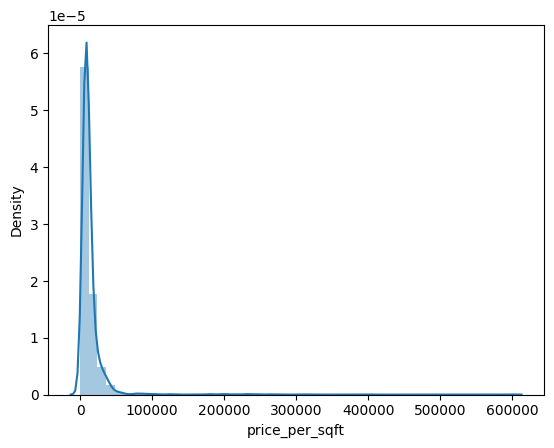

In [135]:
# Price_per_sqft
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

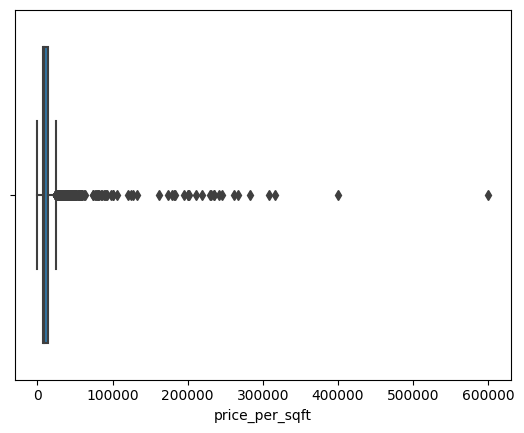

In [136]:
sns.boxplot(x=df['price_per_sqft'])

In [137]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(359,
 count       359.000000
 mean      51863.490251
 std       60028.526868
 min       24202.000000
 25%       27824.500000
 50%       33333.000000
 75%       41790.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [138]:
# the area below 1000 are values that are entered in square yards and reqiures to be multiplied by 9 to change to sqaure feet
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

<ipython-input-138-6c7b9b8ffdf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [139]:
outliers_sqft['area']

2        1440.0
21        450.0
46       1800.0
49       3980.0
71       2700.0
82       2400.0
86       1935.0
109      1170.0
112      3240.0
114      1800.0
126      2430.0
132      1800.0
171      1440.0
182      1935.0
188      2160.0
189      1836.0
199      1265.0
201      1800.0
205      1440.0
209      1440.0
221      6000.0
224       540.0
238      1503.0
268      8250.0
270      3240.0
271      2367.0
273      1467.0
274      2250.0
283      1350.0
297      2700.0
304      1459.0
305      1467.0
308      2340.0
321       603.0
324      2160.0
341      4518.0
368      4860.0
379      2300.0
382      1800.0
390       648.0
391      1350.0
401      1382.0
403      4466.0
405      2700.0
410      1875.0
416      2088.0
420      2700.0
440      1800.0
452      1800.0
458      2430.0
466      1161.0
471      8262.0
505      3240.0
506      2745.0
523      4500.0
530      1575.0
531      2704.0
568       495.0
578      3240.0
586      1350.0
589      1449.0
599      4860.0
600     

In [140]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

<ipython-input-140-f07934424e06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [141]:
outliers_sqft['price_per_sqft']

2       26042.0
21       9333.0
46      36667.0
49      28266.0
71      50000.0
82      25000.0
86      27390.0
109      6410.0
112     32253.0
114     30556.0
126     51440.0
132     45833.0
171     24306.0
182     33592.0
188     31481.0
189     24455.0
199     35178.0
201     33333.0
205      8681.0
209     24306.0
221     26667.0
224     34259.0
238     46906.0
268     26667.0
270     21605.0
271     27461.0
273     25562.0
274     38667.0
283     31481.0
297     45889.0
304     28101.0
305     34083.0
308     39530.0
321     14096.0
324     34491.0
341     37627.0
368      3292.0
379     26087.0
382     45833.0
390      4630.0
391     33333.0
401     41245.0
403     38737.0
405     34037.0
410     25867.0
416     32328.0
420      5556.0
440     35000.0
452     25000.0
458     26502.0
466     43066.0
471      2723.0
505     32593.0
506     43534.0
523     37778.0
530     27302.0
531     24963.0
568     10101.0
578     36883.0
586     25926.0
589     24845.0
599      3909.0
600     

In [142]:
outliers_sqft['price_per_sqft'].describe()

count      359.000000
mean     29184.139276
std      12326.237298
min       2689.000000
25%      25000.000000
50%      29630.000000
75%      35489.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [143]:
df.update(outliers_sqft)

<ipython-input-144-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

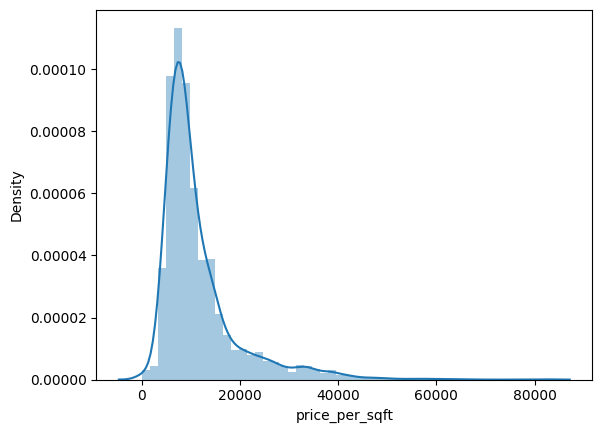

In [144]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

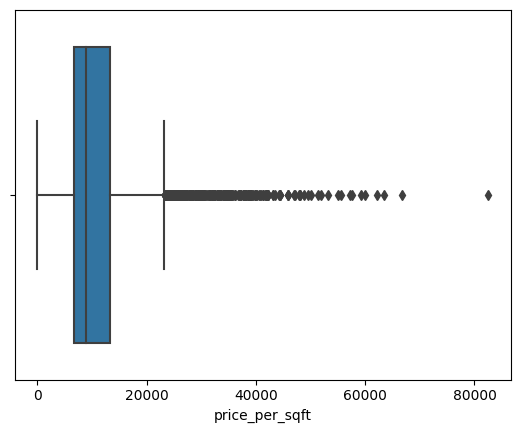

In [145]:
sns.boxplot(x=df['price_per_sqft'])

In [146]:
df[df['price_per_sqft']>50000]

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
126,16 Bedroom House for sale in DLF Phase 4,house,https://www.99acres.com/16-bhk-bedroom-independent-house-villa-for-sale-in-dlf-city-phase-4-gurgaon-2430-sq-ft-spid-L69685724,sector 28,independent,12.50,2430.0,51440.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,"pooja room,study room,servant room,others","DLF Phase 4, Gurgaon, Haryana",4.0,South,Relatively New,"['Dlf phase 1 metro station', 'Huda city centre metro station', 'Iffco chowk metro station', 'New Life Church', 'Hanuman Mandir', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Sitaram Bhartia', 'Max Hospital', 'Dr. Kutbuddin Akbary', 'Sidhesh Hospital Gurgaon', 'Umkal Hospital', 'Marwah Clinic', 'Lord Krishna Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gupta', 'Divine Look Clinic Centre 1', 'Chikitsa', 'Guardian Pharmacy', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Indusind bank', 'Abn amro bank', 'Lord krishna bank', 'Hdfc bank', 'DT Cinemas', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Fat', 'Nowhere Brewpub and cafe', 'Dighent cafe', 'Drunken Monkey', 'Belgian Waffle', 'CCD', 'The Chicken Boat', 'Naveidyam', 'Balaji Vegetarian Paradise', 'Pizza Hut', 'Barbecue Grill', 'PWO house', 'Food Court', 'Stones2milestones', 'Bahrisons library', 'Ncr library']",270 sq yard 4bhk par floor brand new building for sale with lift with car parking corner plot good location nearby galleria market and and supermart one market supermart 2 market vyapar kendra market,"['20 Fan', '1 Exhaust Fan', '16 Geyser', '1 Stove', '30 Light', '16 AC', '1 Modular Kitchen', '4 Chimney', '2 Curtains', '16 Wardrobe', '4 Microwave', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Environment5 out of 5', 'Safety5 out of 5', 'Lifestyle4 out of 5', 'Connectivity5 out of 5']",L69685724,NaN,2430.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0
768,16 Bedroom House for sale in DLF Phase 1,house,https://www.99acres.com/16-bhk-bedroom-independent-house-villa-for-sale-in-dlf-city-phase-1-gurgaon-2844-sq-ft-spid-D69809916,sector 26,independent,14.75,2844.0,51864.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,"pooja room,study room,servant room,store room","Luxurious Builder Floor, DLF Phase 1, Gurgaon, Haryana",4.0,East,New Property,"['Guru dronacharya metro station', 'Dlf phase 1 metro station', 'Sikandarpur rmrg metro station', 'Sikanderpur metro station', 'Sikandarpur metro station', 'Arjan garh metro station', 'Hanuman Mandir', 'Icici bank ATM', 'Punjab national bank ATM', 'Axis bank ATM', 'Icici bank ATM', 'Central bank ATM', 'Anahat Hospital', 'Sikka Maternity And Surgical Center', ""St Stephen's Hospital Health Care Facility"", 'The Dental Lounge', 'Divine Look Clinic Centre 1', 'Marwah Clinic', 'Krishna Family Clinic', 'Durga Poly Clinic', 'Upkar Clinic', ""Dr. Khullar's Dental Clinic"", 'Dental Cure and Care Centre', 'Cosmodentz Dental Clinic', 'Surgi Center Clinic', 'Kailash Nursing Home Gurgaon', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Garg Dental Care', 'Relief Physiotherapy Clinic', 'Uma Sanjeevani Health Centre And Hospital', 'Lord Krishna Hospital', 'RBS Dental Clinic', 'Pharmacy', 'Religare Wellness', '98.4', 'Guardian', 'Emaar Business Park', 'Aya Nagar Bus Terminal', 'Axis bank', 'State bank of india', 'PVR Cinames', 'Food Court', 'Bharat Vasisht Vidya Mandir']",East facing\nBest deal\nLift & stilt parking\nLuxurious construction\nLowest rate guaranteed,"['1 Exhaust Fan', '1 Microwave', '7 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Fridge', 'No Sofa', 'No Stove', 'No 

In [147]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

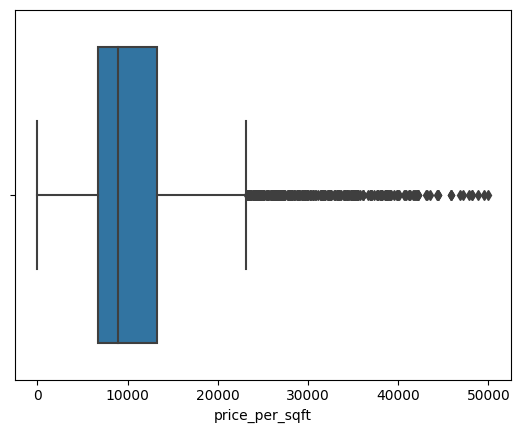

In [148]:
sns.boxplot(x=df['price_per_sqft'])

<ipython-input-149-6be336ca45d9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

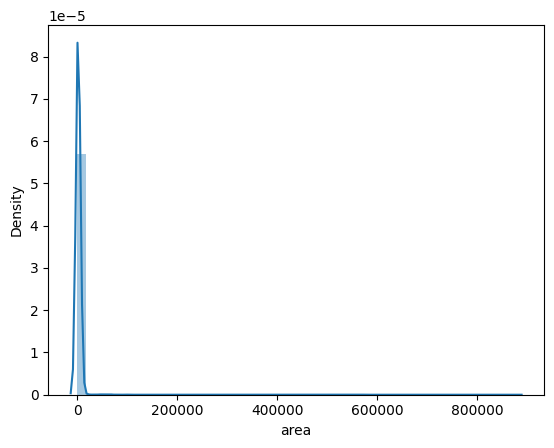

In [149]:
# Area
sns.distplot(df['area'])

<Axes: xlabel='area'>

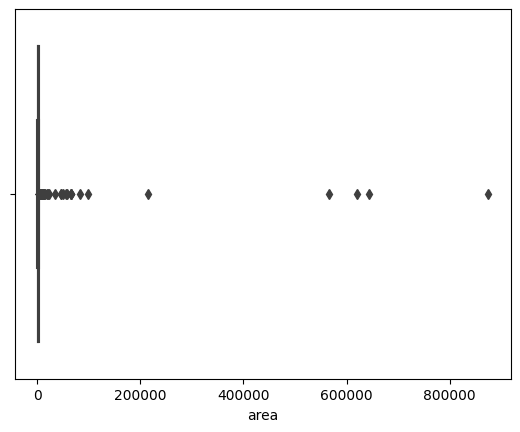

In [150]:
sns.boxplot(x=df['area'])

In [151]:
df.describe()

,price,area,price_per_sqft,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
count,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,1914.000000,1684.000000,1936.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,2.450546,2907.751066,11374.200959,3.303305,3.370203,6.840352,1921.698302,2373.121953,2489.335009,0.186834,0.354478,0.088486,0.171375,0.110341,0.622601
std,2.827631,22882.863006,7485.584040,1.800118,1.839522,6.041255,767.358653,17972.851754,22421.091111,0.389830,0.478418,0.284038,0.376887,0.313356,0.895738
min,0.070000,145.000000,4.000000,1.000000,1.000000,0.000000,89.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.930000,1255.000000,6714.500000,2.000000,2.000000,2.000000,1457.000000,1120.000000,830.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1744.000000,8888.000000,3.000000,3.000000,5.000000,1827.750000,1650.000000,1296.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.650000,2325.000000,13304.500000,4.000000,4.000000,10.000000,2215.000000,2367.000000,1786.250000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,31.500000,875000.000000,50000.000000,21.000000,21.000000,51.000000,10000.000000,737147.000000,607936.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [152]:
df['area'].max(), df['area'].min()

(875000.0, 145.0)

<ipython-input-153-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

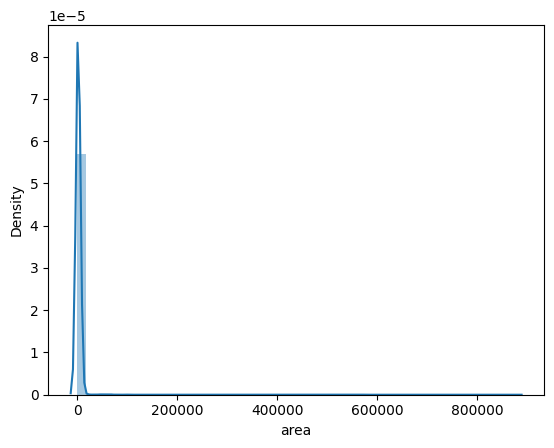

In [153]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

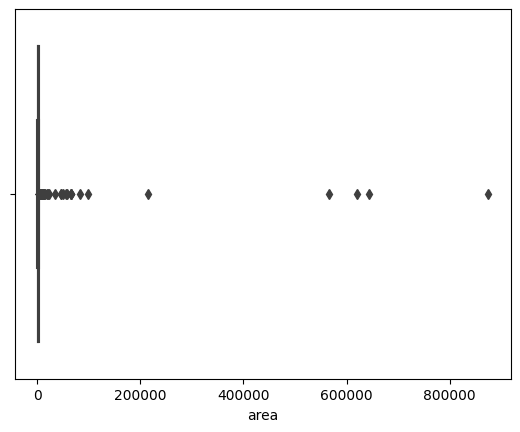

In [154]:
sns.boxplot(x=df['area'])

In [155]:
df['area'].describe()

count      3752.000000
mean       2907.751066
std       22882.863006
min         145.000000
25%        1255.000000
50%        1744.000000
75%        2325.000000
max      875000.000000
Name: area, dtype: float64

In [156]:
df[df['area'] > 100000]

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
566,2 BHK Flat in Sohna,flat,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-hcbs-sports-ville-sohna-gurgaon-737147-sq-ft-spid-Y69214772,sector nearby sohna road,hcbs sports ville,0.35,875000.0,4.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,not available,"Sohna, Gurgaon, Haryana",8.0,NaN,Relatively New,"['The roadside cafe', 'GD Goenka Mess', 'ROyal Kitchen', 'Mithaas Wala', 'Momomia Gurgoan']","View is awesome, towards the aravalli and fresh air with fields alongside.","['1 Water Purifier', '1 Fridge', '1 Fan', '1 Geyser', '1 Stove', '1 Light', '1 Modular Kitchen', '1 AC', '1 Chimney', '1 TV', '1 Curtains', '1 Wardrobe', '1 Sofa', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave']","['Green Area4 out of 5', 'Construction4 out of 5', 'Management4 out of 5', 'Amenities4 out of 5', 'Connectivity2 out of 5']",Y69214772,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
1182,2 BHK Flat in Sector 107 Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-signature-global-solera-2-sector-107-gurgaon-514396-sq-ft-spid-B70122778,sector 107,signature global solera 2,0.51,566667.0,9.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,not available,"A5 301, Sector 107 Gurgaon, Gurgaon, Haryana",3.0,North,New Property,"['Dwarka Expressway', 'Delhi', 'IGI Airport']",It is near metro it is very beautiful,NaN,"['Environment3 out of 5', 'Lifestyle2 out of 5', 'Connectivity3 out of 5', 'Safety1 out of 5']",B70122778,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0
2604,2 BHK Flat in Sector 95 Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-ramsons-kshitij-sector-95-gurgaon-607936-sq-ft-spid-D70174086,sector 95,ramsons kshitij,0.31,620000.0,5.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,"study room,others","Sector 95 Gurgaon, Gurgaon, Haryana",1.0,North-East,Relatively New,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Sagar Clinic', 'Vijay Petrol Pump']","Ambitious, personable agent with 15 years of experience providing\nExtensive knowledge about the real estate community and housing\nMarket. Eager to continue growing in market trends while proving my\nAbility to win clients, guiding them through inception to close, who\nWill refer future business to opendoor.\n Additional details :Piped gas facility is available in the property.\nDaily needs shopping could be done within the society premises to make the stay convinent.\nNo power backup is available.\nThe society has dedicated security guards for every tower.",NaN,"['Green Area4 out of 5', 'Construction4 out of 5', 'Management3.5 out of 5', 'Amenities4 out of 5', 'Connectivity5 out of 5']",D70174086,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,0.0
3374,2 BHK Flat in Sector 95A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-signature-the-roselia-sector-95-a-gurgaon-569243-sq-ft-spid-Y68589358,sector 95,signature the roselia,0.45,642857.0,7.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,not available,"Sector 95A Gurgaon, Gurgaon, Haryana",2.0,South-West,New Property,"['Newtown Square Mall', 'Pataudi Road', 'Dwarka Expressway', 'NH-48', 'Yaduvanshi Shiksha Niketan', 'Gurugram University Sector 87', 'Aarvy Healthcare', 'Indira Gandhi International Airport', 'IMT Manesar', 'Holiday Inn Sector 90', 'National Tennis Academy', 'CNG Petrol Pump']","Highly ventilated and trusted builder, spacious hall and kichen",NaN,"['Green Area4 out of 5', 'Amenities4 out of 5', 'Management4 out of 5', 'Construction4 out of 5', 'Connectivity3 out of 5']",Y68589358,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0
3678,6 Bedroom House for sale in Sector 50 Gurg

In [157]:
df = df[df['area'] < 100000]

<ipython-input-158-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

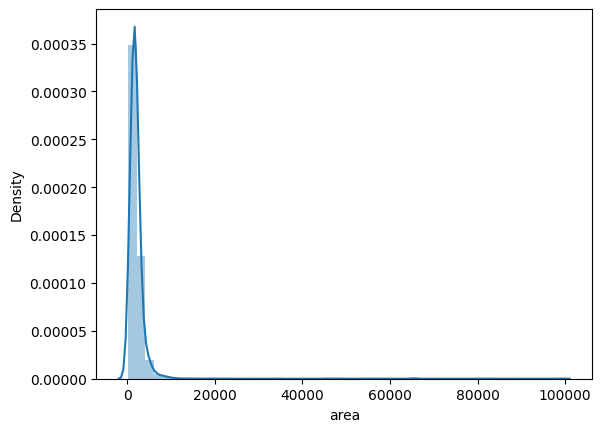

In [158]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

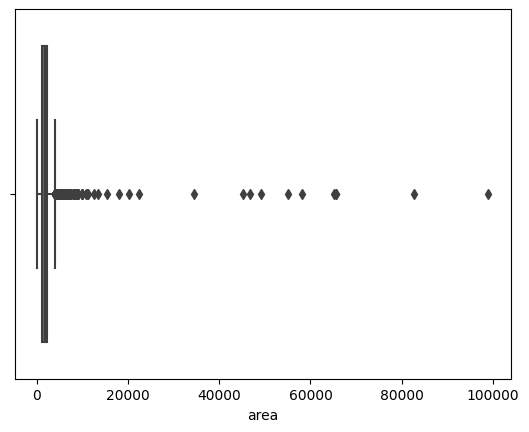

In [159]:
sns.boxplot(x=df['area'])

In [160]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
1712,6 Bedroom House for sale in DLF Phase 1,house,https://www.99acres.com/6-bhk-bedroom-independent-house-villa-for-sale-in-dlf-city-phase-1-gurgaon-4518-sq-ft-spid-Z69661544,sector 26,independent,18.40,98978.0,1859.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 sq.yards (9197.4 sq.m.),6.0,8.0,3+,"pooja room,store room,servant room","111, DLF Phase 1, Gurgaon, Haryana",4.0,South,Relatively New,"['Guru dronacharya metro station', 'Dlf phase 1 metro station', 'Sikandarpur rmrg metro station', 'Sikanderpur metro station', 'Sikandarpur metro station', 'Dlf phase 2 metro station', 'Hanuman Mandir', 'Icici bank ATM', 'Axis bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Sikka Maternity And Surgical Center', 'Anahat Hospital', 'Divine Look Clinic Centre 1', 'The Dental Lounge', ""St Stephen's Hospital Health Care Facility"", 'Marwah Clinic', 'Durga Poly Clinic', 'Krishna Family Clinic', 'Upkar Clinic', 'Surgi Center Clinic', 'Lord Krishna Hospital', 'Uma Sanjeevani Health Centre And Hospital', 'Cosmodentz Dental Clinic', 'Kailash Nursing Home Gurgaon', ""Dr. Khullar's Dental Clinic"", 'Relief Physiotherapy Clinic', 'RBS Dental Clinic', 'Sidhesh Hospital Gurgaon', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Cure and Care Centre', 'Religare Wellness', '98.4', 'Guardian', 'Emaar Business Park', 'Axis bank', 'Hsbc bank', 'Kotak mahindra bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'PVR Cinames', 'Food Court', 'Nowhere Brewpub and cafe']","Dlf city phase 1 a block duplex kothi sale in gurgaon haryana.....Its very ultra luxury interiors in this kothi and swimming pool, home theattre, lift, 100% power back up facility available in this kothi.....Any query pls call","['6 Wardrobe', '16 Fan', '1 Exhaust Fan', '8 Geyser', '1 Stove', '94 Light', '11 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Environment5 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5', 'Safety5 out of 5']",Z69661544,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,2.0
2321,10 Bedroom House for sale in Prem Nagar,house,https://www.99acres.com/10-bhk-bedroom-independent-house-villa-for-sale-in-ganpati-heights-apartment-prem-nagar-gurgaon-82800-sq-ft-spid-B68707994,sector 13,ganpati heights apartment,1.25,82781.0,151.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,others,"Prem Nagar, Gurgaon, Haryana",3.0,South-East,Old Property,"['Hanuman Mandir', 'Sheetla Mata Mandir', 'Lotus Hospital Gurgaon', 'Mamta Hospital Gurgaon', 'Jackson Hospital', 'Dental Health Centre', 'Ahooja Eye and Dental Institute Hospital', 'M Goel Hospital', 'Dr. Sandeep Chauhan', 'Saraswati Hospital Gurgaon', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Lall Nursing and Maternity Home', 'Lalit Dental Care', 'Om Charitable Dental & Implant Centre', 'Dentecare - Multispeciality Dental Clinic', 'Lall Eye Care Centre', 'Kharbanda Maternity and Nursing Home', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Gupta Hospital Gurgaon', 'Nidhi Clinic', 'Dr. Sarvejeet Singh', 'Dr. Babita Sharma', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Tomar Clinic', 'Children Hospital', 'Sharma Hospital Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Bhatnagar Maternity and Nursing Home', 'Kalyani Hospital Gurgaon', 'GH Gurgaon', 'Dr. Ajay S. Gupta Clinic', 'Jeevan Jyoti Hospital Gurgaon', 'Sheetla Clinic', 'Sparsh Hospital Gurgaon', 'Kishor Clinic', 'Triveni Hospital Gurgaon', 'Bindal Clinic', 'M.S Hospital', 'Ravi Clinic and Health Care Centre', 'My Care Clinic', 'Indian Oil', 'Rang Parivartan', 'Punja

In [161]:
pd.set_option('max_colwidth', None)
df[df['area'] > 10000].sort_values('area',ascending=False)[['property_name', 'property_type', 'area', 'society', 'sector','price','areaWithType', 'bedRoom', 'bathroom',
       'balcony','super_built_up_area', 'built_up_area','carpet_area', 'floorNum']]

,property_name,property_type,area,society,sector,price,areaWithType,bedRoom,bathroom,balcony,super_built_up_area,built_up_area,carpet_area,floorNum
1712,6 Bedroom House for sale in DLF Phase 1,house,98978.0,independent,sector 26,18.40,Plot area 502(419.74 sq.m.)Carpet area: 11000 sq.yards (9197.4 sq.m.),6.0,8.0,3+,NaN,NaN,11000.00,4.0
2321,10 Bedroom House for sale in Prem Nagar,house,82781.0,ganpati heights apartment,sector 13,1.25,Plot area 115(7692.86 sq.m.),10.0,6.0,2,NaN,115.0,NaN,3.0
2187,3 BHK Flat in Sector 95 Gurgaon,flat,65517.0,rof ananda,sector 95,0.38,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,NaN,NaN,64412.00,12.0
468,2 BHK Flat in Sector 95 Gurgaon,flat,65517.0,rof ananda,sector 95,0.38,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,NaN,NaN,64529.00,10.0
716,10 Bedroom House for sale in DLF Phase 4,house,65261.0,dlf city plot phase 4,sector 28,13.00,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,NaN,NaN,7250.00,1.0
2726,2 BHK Flat in Sector 86 Gurgaon,flat,58228.0,pyramid elite,sector 86,0.46,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,NaN,NaN,58141.00,0.0
2297,2 BHK Flat in Sector 95 Gurgaon,flat,55000.0,rof ananda,sector 95,0.33,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,NaN,NaN,54917.00,13.0
298,1 BHK Flat in Sohna,flat,49123.0,signature the serenas,sector nearby sohna road,0.28,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,NaN,NaN,48811.00,1.0
1163,9 Bedroom House for sale in DLF Phase 2,house,46795.0,independent,sector 25,7.30,Plot area 215(179.77 sq.m.)Built Up area: 5800 sq.yards (4849.54 sq.m.)Carpet area: 5200 sq.yards (4347.86 sq.m.),9.0,9.0,2,NaN,5800.0,5200.00,3.0
2793,2 BHK Flat in Sector 95 Gurgaon,flat,45283.0,ramsons kshitij,sector 95,0.24,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,NaN,NaN,45966.00,10.0


In [163]:
# dropping the rows with extreme area values which doesn't seems valid while verifying the details on website for similar houses of same locality

df.drop(index=[1712, 2321, 2187, 468, 716, 2726, 2297, 298, 1163, 2793, 2704, 385, 3250, 2130, 763, 1937, 1138, 868], inplace=True)


# converting the sq.m to sq.feet
df.loc[2571,'area'] = 11000
df.loc[673,'area'] = 11286

In [175]:
df1 = df[['areaWithType','super_built_up_area','built_up_area', 'carpet_area']]
df1.head()

,areaWithType,super_built_up_area,built_up_area,carpet_area
0,Carpet area: 450 (41.81 sq.m.),NaN,NaN,450.0
1,Super Built up area 1617(150.22 sq.m.),1617.0,NaN,NaN
2,Plot area 160(14.86 sq.m.),NaN,160.0,NaN
3,Super Built up area 1832(170.2 sq.m.)Carpet area: 1580 sq.ft. (146.79 sq.m.),1832.0,NaN,1580.0
4,Super Built up area 2390(222.04 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),2390.0,2000.0,1600.0


In [178]:
# cross examining the values based on different metric terms
df1.to_csv('/content/gdrive/MyDrive/Project - Real Estate/outlier_treatment.csv',index=False)

<ipython-input-164-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

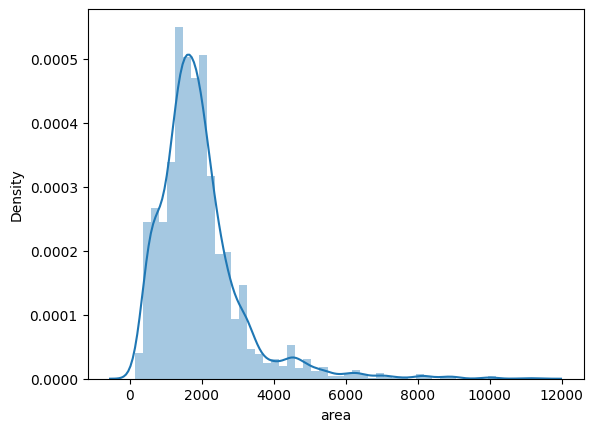

In [164]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

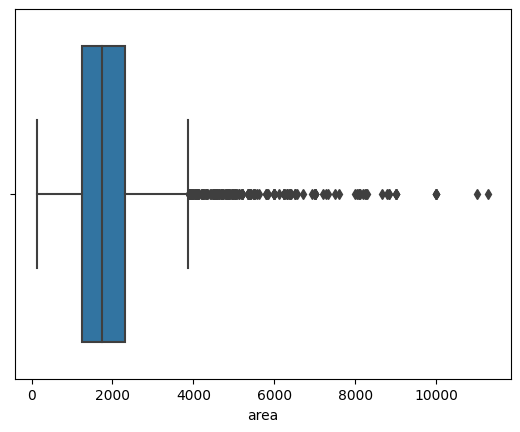

In [165]:
sns.boxplot(x=df['area'])

In [166]:
df['area'].describe()

count     3729.000000
mean      1933.397694
std       1199.462969
min        145.000000
25%       1250.000000
50%       1740.000000
75%       2300.000000
max      11286.000000
Name: area, dtype: float64

<ipython-input-167-e07eecfba270>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

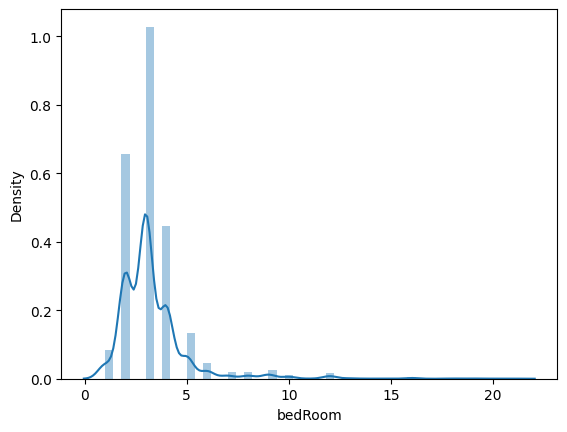

In [167]:
# Bedroom
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

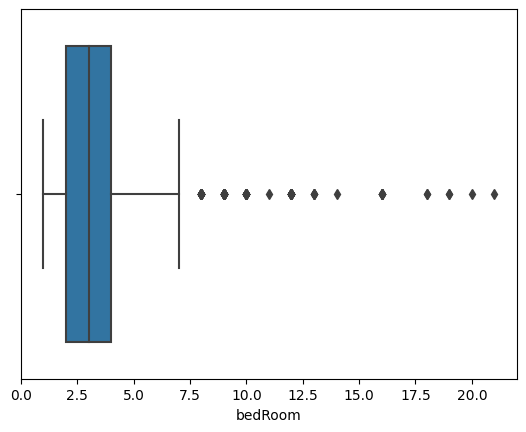

In [168]:
sns.boxplot(x=df['bedRoom'])

In [169]:
df['bedRoom'].describe()

count    3729.000000
mean        3.298203
std         1.789514
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [170]:
df[df['bedRoom'] > 12].sort_values('bedRoom',ascending=False)

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
466,21 Bedroom House for sale in Sector 54 Gurgaon,house,https://www.99acres.com/21-bhk-bedroom-independent-house-villa-for-sale-in-sector-54-gurgaon-1161-sq-ft-spid-R69483164,sector 54,independent,5.00,1161.0,43066.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5.0,North,Relatively New,"['Sector 53-54 metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Paras Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'The Dental Lounge', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Icici bank', 'Hdfc bank', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', '222', 'Naivedyam Restaurant', 'Clock tower', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Suncity School', 'Iilm University', 'IILM', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology']","129 sq yd plot size. 5 floors built up , fully furnished building, 21rk , best for investors, prime location. Golf course road. Monthly rental income 3.25l","['1 Water Purifier', '21 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '21 Geyser', '1 Stove', '21 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '21 Bed', '21 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No AC', 'No TV']","['Environment4 out of 5', 'Lifestyle5 out of 5', 'Connectivity4 out of 5', 'Safety4 out of 5']",R69483164,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0
3701,20 Bedroom House for sale in Sushant Lok Phase 1,house,https://www.99acres.com/20-bhk-bedroom-independent-house-villa-for-sale-in-sushant-lok-phase-1-gurgaon-1152-sq-ft-spid-V69218808,sector 43,independent,4.50,1152.0,39062.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",4.0,East,Relatively New,"['Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Hdfc bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Citi bank ATM', 'Icici ATM', 'Axis bank ATM', 'Hdfc ATM', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gupta', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Arihant Hospital', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Centre For Sight Gurgaon Sector 29', 'Guardian Pharmacy', 'Chikitsa', 'Gardian Pharmacy', 'City Medical', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Naveidyam', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Dighent cafe', 'Pizza Hut', 'Fat', 'Nowhere Brewpub and cafe', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']",Best for investment purpose. 3l rupees monthly rental,"['1 Water Purifier', '1 Fridge', '20 Fan', '1 Exhaust Fan', '1 Dining Table', '20 Geyser', '1 Stove', '1 Curtains', '20 Bed', '20 Wardrobe', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No AC', 'No Chimney', 'No Modular Kitchen', 'No Light', 'No TV']","['Environment5 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5', 'Safety5 out of 5']",V69218808,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0
3657,19 Bedroom House for sale in Sector 17A Gurgaon,house,https://www.99acres.com/19-bhk-bedroom-independent-house-villa-for-sale-in-

In [171]:
df = df[df['bedRoom'] <= 12]

In [179]:
df.shape

(3711, 31)

<ipython-input-180-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

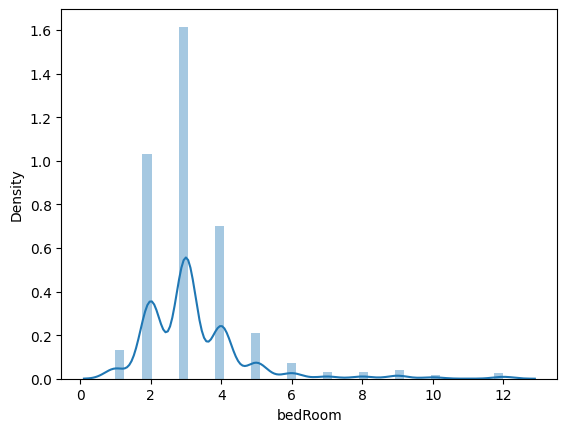

In [180]:

sns.distplot(df['bedRoom'])

In [ ]:
sns.boxplot(x=df['bedRoom'])

In [181]:
df['bedRoom'].describe()

count    3711.000000
mean        3.235247
std         1.538861
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bedRoom, dtype: float64

<ipython-input-182-4bd734be31d0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

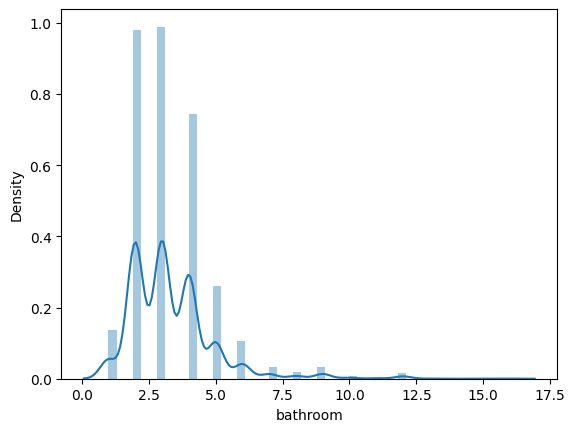

In [182]:
# Bathroom

sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

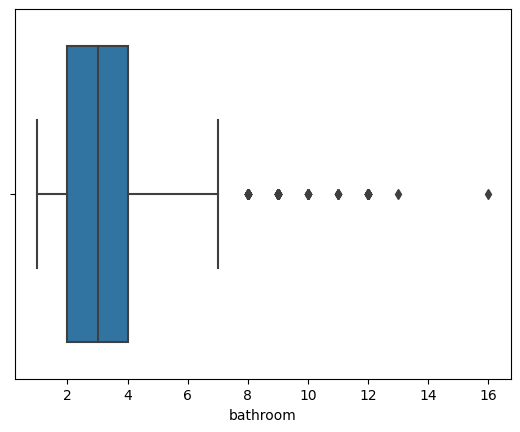

In [183]:
sns.boxplot(x=df['bathroom'])

In [184]:
df['bathroom'].value_counts(ascending=False)

3.0     1101
2.0     1091
4.0      829
5.0      290
1.0      153
6.0      117
9.0       38
7.0       37
8.0       22
12.0      19
10.0       8
11.0       4
13.0       1
16.0       1
Name: bathroom, dtype: int64

In [ ]:
df[df['bathroom'] > 12].sort_values('bathroom',ascending=False)

In [185]:
df = df[df['bathroom'] < 12]

In [186]:
df['bathroom'].value_counts(ascending=False)

3.0     1101
2.0     1091
4.0      829
5.0      290
1.0      153
6.0      117
9.0       38
7.0       37
8.0       22
10.0       8
11.0       4
Name: bathroom, dtype: int64

<ipython-input-187-94aba8d3036c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

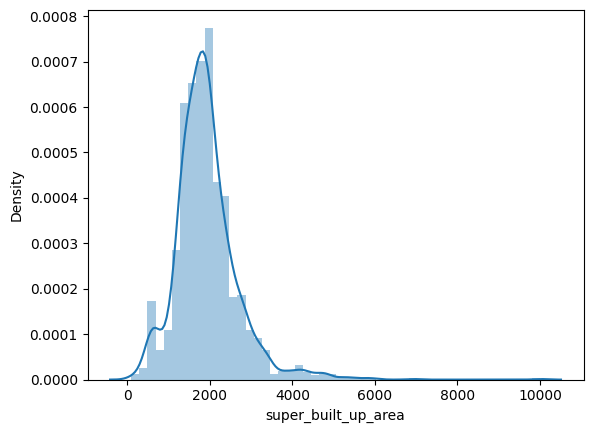

In [187]:
# super built up area

sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

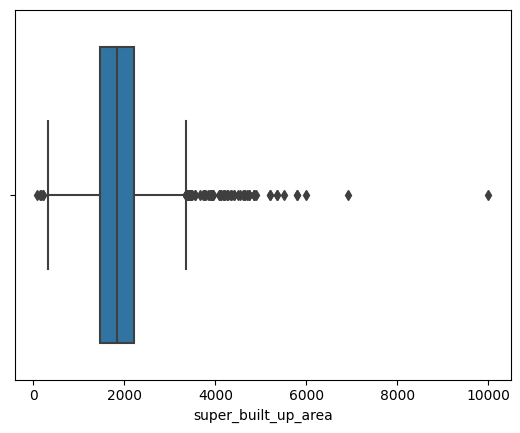

In [188]:
sns.boxplot(x=df['super_built_up_area'])

In [189]:
df['super_built_up_area'].describe()

count     1914.000000
mean      1921.698302
std        767.358653
min         89.000000
25%       1457.000000
50%       1827.750000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [190]:
df[df['super_built_up_area'] > 5800]

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
287,4 BHK Flat in Gwal Pahari,flat,https://www.99acres.com/4-bhk-bedroom-apartment-flat-for-sale-in-gwal-pahari-gurgaon-6000-sq-ft-r5-spid-O20505021,sector nearby gwal pahari,Paras Quartier Gwal Pahari,7.0,6364.0,11000.0,Super Built up area 6000(557.42 sq.m.),4.0,4.0,3+,servant room,"Paras Quartier, Gurgaon-Faridabad Road, Gwal Pahari, Gurgaon, Haryana",6.0,South-West,Relatively New,"['HANUMAN MANDIR', 'SHIV MANDIR BALIYAWAS', 'Indusind bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Parivar Clinic', 'Janki Max Hospital', 'Arunodaya Deseret Eye Hospital', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'Hdfc bank', 'Icici bank', 'State bank of india', 'Indusind bank', 'Kotak mahindra bank', 'Axis bank', 'CHINESE CORNER', 'Naivedyam Restaurant', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'GOVERNMENT SCHOOL', 'Regional Skill Development Centre', 'Suncity School', 'Ansal Institute of Technology', 'Sushant College of Arts & Architecture']","South facing apartment, 4 bedrooms, 6000 sq.Ft. On lower floor is available for sale in paras quartier, gurgaon faridabad road, gwal pahari, gurgaon. Edc, idc, plc, car parking and other charges if any are payable extra. \nParas quartier is the most exclusive address on gurgaons skyline. A super luxury project, it creates a new standard, a new benchmark and a new trend in luxury development amongst the various residential projects in gurgaon. An expansive layout that spread over 10 acres offers wide spaces and ample green areas making it one of most serene and peaceful residential property in gurgaon. This exclusive superluxury property in gurgaon, is highlighted by the iconic tower and two grand condominium towers.\n Additional details :The apartment has munciple supply water supply.\nDaily needs shopping could be done within the society premises to make the stay convinent.\nNo power backup is available.\nThere is also a separate washroom for domestic help.\nThe society has dedicated security guards for every tower.",[],NaN,O20505021,6000.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0
2217,4 BHK Flat in Sector 81 Gurgaon,flat,https://www.99acres.com/4-bhk-bedroom-apartment-flat-for-sale-in-bestech-park-view-grand-spa-sector-81-gurgaon-6926-sq-ft-r3-spid-R61758448,sector 81,bestech park view grand spa,4.7,6926.0,6786.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,servant room,"1908, Sector 81 Gurgaon, Gurgaon, Haryana",19.0,North,Relatively New,"['Sapphire 83 Mall', 'NH-8, IMT Manesar', 'Dwarka Expressway', ""St. Xavier's High School"", 'Spectra Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Hyatt Regency Gurgaon', 'SkyJumper Trampoline Park', 'National Tennis Academy']","Semi furnished 4bhk 6926sqft penthouse with personal swimming pool and terrace garden, 2 floor apartment with huge balconies at bestech park view grand spa in sector-81, gurgaon by bestech group builders is a residential project. Bestech park view grand spa has a total of 10 towers.\nLocation advantage\nIgi airport- 20 mins, proposed metro station- 5 mins, sapphire 83 mall- 9 mins, medanta hospital- 31 mins, delhi public school- 7 mins, rockland hospital- 5 - 10 minutes, itc grand bharat 10 - 20 minutes, nh8 5 - 10 minutes, haldiram 10 - 20 minutes, cyber city 20 - 30 minutes, huda city metro station 20 - 30 minutes\nTop facilities in this project\nAutomated car wash, acupressure par, swimming pool, golf course, salon, card room, restaurant, high speed elevators, waiting lounge\nOther facilities\nSauna, jacuzzi, piped gas, spa, steam room, water softener plant, creche/day care, skating rink, squash court, wi-Fi connectivity, pool table, property staff, cafeteri

<ipython-input-191-40a37a75e5eb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

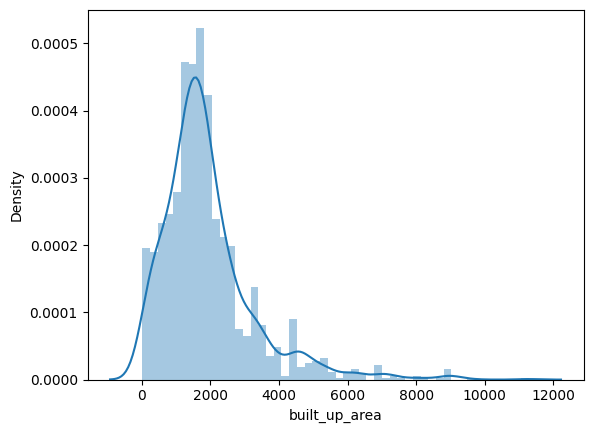

In [191]:
# built up area
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

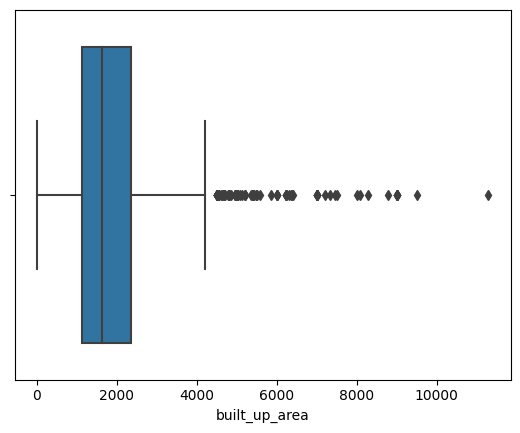

In [192]:
sns.boxplot(x=df['built_up_area'])

In [193]:
df[df['built_up_area'] > 8000]

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
467,3 Bedroom House for sale in Sohna Road,house,https://www.99acres.com/3-bhk-bedroom-independent-house-villa-for-sale-in-sohna-road-gurgaon-9000-sq-ft-spid-C67726794,sector nearby sohna road,independent,6.25,9001.0,6944.0,Plot area 1000(836.13 sq.m.),3.0,3.0,0,not available,"Sohna Road, Gurgaon, Haryana",1.0,NaN,Moderately Old,"['Rajiv Chowk Mosque', 'Standard chartered ATM', 'Icici bank ATM', 'Samvit Health Care', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Sukhmani Hospital Pvt. Ltd', 'Airforce Hospital', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Bansal Medicare and Maternity Centre', 'Meher Clinic', 'Pushpanjali Hospital Gurgaon', 'Dispencery', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Pushpanjali Hospital', 'Bones Clinic - Orthopaedics', 'Smile Plus Dental Clinic', 'Vaishnavi Nursing Home', 'Skin Clinic', 'Rajendra Hospital', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", 'Darbar', ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section', 'CR Model Public School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","We are proud owners of house/villa available for sale in sohna road, gurgaon. Available at price of rs 6.25 crores. It has plot area of 1000 sq yards. It has 3 bhk, 3 bathroom, 0 balcony.It is a freehold property",[],NaN,C67726794,NaN,9000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
673,6 Bedroom House for sale in Sushant Lok Phase 1,house,https://www.99acres.com/6-bhk-bedroom-independent-house-villa-for-sale-in-sushant-lok-phase-1-gurgaon-11286-sq-ft-spid-F69574832,sector 43,independent,27.50,11286.0,24366.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,"pooja room,study room,servant room,others","Sushant Lok 1, Sushant Lok Phase 1, Gurgaon, Haryana",3.0,North-East,Relatively New,"['Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Hdfc bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Citi bank ATM', 'Icici ATM', 'Axis bank ATM', 'Hdfc ATM', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gupta', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Arihant Hospital', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Centre For Sight Gurgaon Sector 29', 'Guardian Pharmacy', 'Chikitsa', 'Gardian Pharmacy', 'City Medical', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Naveidyam', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Dighent cafe', 'Pizza Hut', 'Fat', 'Nowhere Brewpub and cafe', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']",Sushant lok 1 very prime location. This villa well maintain. All facility walking distance. All details call me,"['1 Water Purifier', '6 Fan', '1 Exhaust Fan', '7 Geyser', '1 Stove', '22 Light', '7 AC', '1 Modular Kitchen', '2 Chimney', '1 Curtains', '10 Wardrobe', '1 Microwave', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Environment5 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5', 'Safety5 out of 5']",F69574832,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0
780,4 Bedroom House for sale in DLF Phase 1,house,https://www.99acres.com/4-bhk-bedroom-independent-house-villa-for-sale-in-dlf-city-phase-1-gurgaon-

<ipython-input-194-6d17c491fe71>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

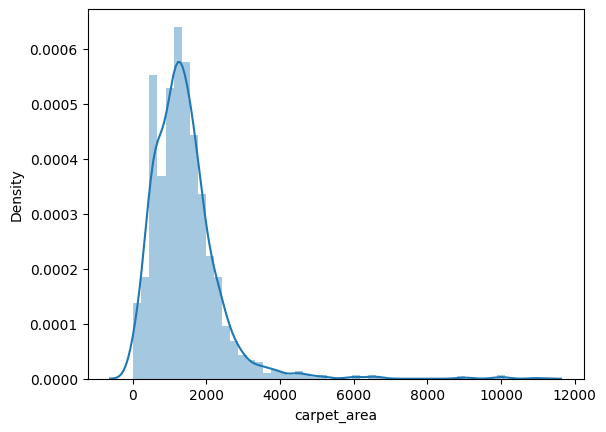

In [194]:
# carpet area
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

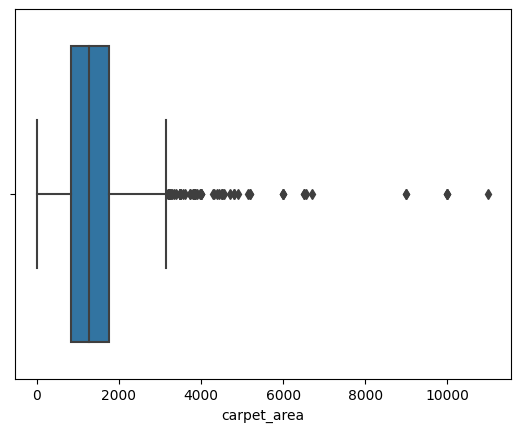

In [195]:
sns.boxplot(x=df['carpet_area'])

In [196]:
df[df['carpet_area'] > 8000]
# the property price and other features makes sense for the property with larger carpet area

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
1185,7 Bedroom House for sale in DLF Phase 1,house,https://www.99acres.com/7-bhk-bedroom-independent-house-villa-for-sale-in-dlf-city-phase-1-gurgaon-550-sq-ft-spid-H69661258,sector 26,independent,18.25,10000.0,18250.0,Plot area 550(51.1 sq.m.)Carpet area: 10000 sq.ft. (929.03 sq.m.),7.0,9.0,3+,"pooja room,study room,servant room,store room","A Block, DLF Phase 1, Gurgaon, Haryana",4.0,East,Relatively New,"['Guru dronacharya metro station', 'Dlf phase 1 metro station', 'Sikandarpur rmrg metro station', 'Sikanderpur metro station', 'Sikandarpur metro station', 'Dlf phase 2 metro station', 'Hanuman Mandir', 'Icici bank ATM', 'Axis bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Sikka Maternity And Surgical Center', 'Anahat Hospital', 'Divine Look Clinic Centre 1', 'The Dental Lounge', ""St Stephen's Hospital Health Care Facility"", 'Marwah Clinic', 'Durga Poly Clinic', 'Krishna Family Clinic', 'Upkar Clinic', 'Surgi Center Clinic', 'Lord Krishna Hospital', 'Uma Sanjeevani Health Centre And Hospital', 'Cosmodentz Dental Clinic', 'Kailash Nursing Home Gurgaon', ""Dr. Khullar's Dental Clinic"", 'Relief Physiotherapy Clinic', 'RBS Dental Clinic', 'Sidhesh Hospital Gurgaon', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Cure and Care Centre', 'Religare Wellness', '98.4', 'Guardian', 'Emaar Business Park', 'Axis bank', 'Hsbc bank', 'Kotak mahindra bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'PVR Cinames', 'Food Court', 'Nowhere Brewpub and cafe']","Ultra luxury duplex kothi sale in dlf phase 1 gurgaon. Its very close to qutub plaza market & dlf shopping mall, dlf phase 1 rapid metro.........Any enquery pls call vikas singh","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Stove', '1 Light', '1 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Environment5 out of 5', 'Safety5 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5']",H69661258,NaN,NaN,10000.0,1.0,1.0,1.0,1.0,0.0,2.0
1222,5 Bedroom House for sale in DLF Phase 2,house,https://www.99acres.com/5-bhk-bedroom-independent-house-villa-for-sale-in-dlf-city-phase-2-gurgaon-9500-sq-ft-spid-G69523296,sector 25,independent,10.00,2700.0,37037.0,Plot area 2700(250.84 sq.m.)Built Up area: 9500 sq.ft. (882.58 sq.m.)Carpet area: 9000 sq.ft. (836.13 sq.m.),5.0,5.0,3+,"pooja room,servant room","M Block Corner, DLF Phase 2, Gurgaon, Haryana",3.0,East,Moderately Old,"['Mg road metro station', 'Vodafone belvedere towers metro station', 'Dlf phase 2 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Jain Bhawan', 'Arya Samaj Mandir', 'Axis bank ATM', 'Central bank ATM', 'Uma Sanjeevani Health Centre And Hospital', 'Surgi Center Clinic', 'Lord Krishna Hospital', 'Privat Hospital', 'Sidhesh Hospital Gurgaon', 'Kailash Nursing Home Gurgaon', 'Cosmodentz Dental Clinic', 'Durga Poly Clinic', 'Guardian', '98.4', 'Religare Wellness', 'Neelkanth Medico', 'DLF Cyber City Phase II', 'Emaar Business Park', 'Hsbc bank', 'Kotak mahindra bank', 'Hdfc bank', 'Lord krishna bank', 'Abn amro bank', 'Indusind bank', 'Axis bank', 'Standard chartered bank', 'PVR Cinames', 'PVR Metropolitan', 'DT Cinemas', 'PVR Cinames', 'DT Cinemas', 'Pan Bangkok', 'NutrioBox Gurugram', 'Mukesh Dhaba', 'American Montessori']",This is corner unit near to highway five bedroom duplex single unit suitable for business corporate family,"['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '1 Dining Table', '3 Geyser', '5 Light', '3 AC', '1 Chimney', '4 Curta

In [197]:
df.head()

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-sector-99-a-gurgaon-450-sq-ft-r1-spid-O66187314,sector 99a,laxmi pareena,0.30,450.0,6666.0,Carpet area: 450 (41.81 sq.m.),2.0,1.0,0,not available,"Sector 99a, Gurgaon, Haryana, India, Sector 99A Gurgaon, Gurgaon, Haryana",12.0,North,Undefined,NaN,"2bhk affordable, ready to shift in sec 99a laxmi pareena sector 99a, gurgaon, haryana, india","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Environment4 out of 5', 'Lifestyle3 out of 5', 'Connectivity3 out of 5', 'Safety3 out of 5']",O66187314,NaN,NaN,450.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-godrej-icon-sector-88-a-gurgaon-1617-sq-ft-spid-S69145532,sector 88a,godrej icon,1.31,1617.0,8100.0,Super Built up area 1617(150.22 sq.m.),2.0,2.0,3+,study room,"Sector 88A Gurgaon, Gurgaon, Haryana",3.0,North-West,Relatively New,"['JMS Crosswalk', ""Saint Paul's School"", 'Indus valley Public School', 'MDS Public School', 'Gurugram University', 'Axis Bank ATM', 'Genesis Hospital', 'Shri Balaji’s Multispeciality Hospital', 'Signature Super Speciality Hospital', 'Health care pharmacy', 'Jadon Pharmacy', 'Harsaru Village Bus Stop', 'Garhi Harsaru Junction', 'Hyatt Regency Gurgaon', 'Essar Petrol Pump']","This lovely 2 bhk apartment/flat in sector 88a gurgaon is available for sale in one of gurgaon's most popular projects, godrej icon. This property faces the north-East direction. The flat is over 1617 sq.Ft. Super built up area and comes with 2 bedroom(s), 2 bathrooms and more than 3 balconies. This flat is situated on the 3rd floor of this 32 floors tall residential building. An added advantage of this 1-5 years old flat is that it is available for immediate possession as the project is already ready to move. The flat comes well built with vitrified flooring options. The flat will offer a modern lifestyle as it is presented with many of the amenities such as swimming pool, shopping centre, club house / community center, fitness centre / gym, park, lift(s), visitor parking, maintenance staff and water softening plant. The housing society ensures a continuous supply of water to your flat from municipal corporation.\n Additional details :Piped gas facility is available in the property.\nThe apartment has borings water supply.\nDaily needs shopping could be done within the society premises to make the stay convinent.\nFull power backup is available.\nThere is also a separate washroom for domestic help.\nThe society has dedicated security guards for every tower.",NaN,NaN,S69145532,1617.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
2,4 Bedroom House for sale in Sector 54 Gurgaon,house,https://www.99acres.com/4-bhk-bedroom-independent-house-villa-for-sale-in-sector-54-gurgaon-160-sq-ft-r6-spid-B59842588,sector 54,independent,3.75,1440.0,26042.0,Plot area 160(14.86 sq.m.),4.0,4.0,3,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",3.0,East,Moderately Old,"['Sector 53-54 metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Paras Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'The Dental Lounge', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca'

<ipython-input-198-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

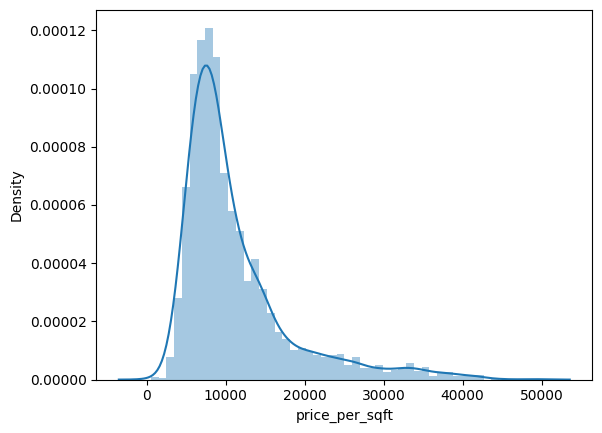

In [198]:
sns.distplot(df['price_per_sqft'])

<Axes: >

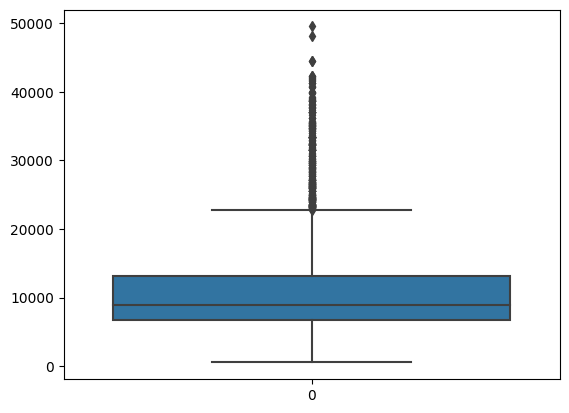

In [199]:
sns.boxplot(df['price_per_sqft'])

In [200]:
print(df['price_per_sqft'].quantile(0.2))
print(df['price_per_sqft'].quantile(0.4))
print(df['price_per_sqft'].quantile(0.5))
print(df['price_per_sqft'].quantile(0.7))
print(df['price_per_sqft'].quantile(0.9))
print(df['price_per_sqft'].quantile(0.95))
print(df['price_per_sqft'].quantile(0.96))
print(df['price_per_sqft'].quantile(0.97))
print(df['price_per_sqft'].quantile(0.98))
print(df['price_per_sqft'].quantile(0.99))

6388.8
8080.6
8886.0
11777.199999999993
20370.0
26667.0
29022.0
31673.269999999997
34018.75999999994
37627.0


In [201]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [202]:
print(df['price_per_sqft'].quantile(0.2))
print(df['price_per_sqft'].quantile(0.4))
print(df['price_per_sqft'].quantile(0.5))
print(df['price_per_sqft'].quantile(0.7))
print(df['price_per_sqft'].quantile(0.9))
print(df['price_per_sqft'].quantile(0.95))
print(df['price_per_sqft'].quantile(0.96))
print(df['price_per_sqft'].quantile(0.97))
print(df['price_per_sqft'].quantile(0.98))
print(df['price_per_sqft'].quantile(0.99))

6390.8
8080.6
8887.5
11779.299999999994
20370.0
26667.0
29022.0
31673.269999999997
34018.75999999994
37627.0


In [203]:
df[df['price_per_sqft'] > 37627]

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
274,4 Bedroom House for sale in Sector 66 Gurgaon,house,https://www.99acres.com/4-bhk-bedroom-independent-house-villa-for-sale-in-emaar-mgf-marbella-sector-66-gurgaon-2403-sq-ft-spid-Q69453972,sector 66,emaar mgf marbella,8.70,2250.0,38667.0,Plot area 250(209.03 sq.m.)Built Up area: 267 sq.yards (223.25 sq.m.),4.0,5.0,2,"study room,servant room","Sector 66 Gurgaon, Gurgaon, Haryana",3.0,East,New Property,"['Sector 55-56 Rapid Metro Station', 'HUB 66', 'NH 48', 'Hasanpur', 'Gurugram University', 'Delhi Public School', 'Park Hospital', 'Indira Gandhi International Airport', 'Sealdah', 'Vatika Business Centre', 'The Oberoi', 'De Adventure Park', 'DLF Golf and Country Club', 'Tau DeviLal Sports Complex']","Looking to buy an independent house in gurgaon? Do check out this 4 bhk house in sector 66 gurgaon, which is an ideal choice for a family. The house has over super built up area of 250 sq.Yards and comes with 4 bedrooms, 5 bathrooms and 2 balconies. The owner of the house also gets 2 covered parking slot(s) to park their car safely. This 0-1 year old property is available for immediate possession as the house is ready to move. It is a freehold property. By paying just 8.7 crore, you can become the proud owner of this independent house. The independent house is designed very well and will provide modern facilities such as maintenance staff, visitor parking, park, fitness centre / gym, swimming pool, club house / community center and security personnel. The housing society ensures a continuous supply of water to your house from municipal corporation. This residential house is east-Facing direction. The well built vitrified flooring enhances the aesthetic appeal of this independent house. The vitrified flooring of this independent house is beautifully designed and helps to give it a pleasing look.",NaN,"['Environment3 out of 5', 'Lifestyle4 out of 5', 'Connectivity4 out of 5', 'Safety4 out of 5']",Q69453972,NaN,267.00,NaN,1.0,1.0,0.0,0.0,0.0,0.0
401,3 BHK Flat in Sector 54 Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartment-flat-for-sale-in-sector-54-gurgaon-1382-sq-ft-spid-N68022370,sector 54,dlf the grove,5.70,1382.0,41245.0,Built Up area: 1382 (128.39 sq.m.),3.0,3.0,3,not available,"Sector 54, Sector 54 Gurgaon, Gurgaon, Haryana",1.0,East,Undefined,"['Sector 54 chowk metro station', 'Sector 53-54 metro station', 'Sector metro station', 'Sector metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'Paras Hospital Gurgaon', 'pracksht hospital', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank', 'Icici bank', 'Hdfc bank & atm', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', 'Hdfc bank and atm', '222', 'Naivedyam Restaurant', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Pizza Hut', 'Suncity School', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'IILM']",3bhk multistorey apartment for resale in dlf the grove at sector 54 dlf the grove sector 54,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Safety4 out of 5', 'Lifestyle5 out of 5

In [204]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

257.0

In [210]:
df[(df['area']/df['bedRoom'])<257]

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-sector-99-a-gurgaon-450-sq-ft-r1-spid-O66187314,sector 99a,laxmi pareena,0.30,450.0,6667.0,Carpet area: 450 (41.81 sq.m.),2.0,1.0,0,not available,"Sector 99a, Gurgaon, Haryana, India, Sector 99A Gurgaon, Gurgaon, Haryana",12.0,North,Undefined,NaN,"2bhk affordable, ready to shift in sec 99a laxmi pareena sector 99a, gurgaon, haryana, india","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Environment4 out of 5', 'Lifestyle3 out of 5', 'Connectivity3 out of 5', 'Safety3 out of 5']",O66187314,NaN,NaN,450.000000,0.0,0.0,0.0,0.0,0.0,0.0
21,5 Bedroom House for sale in Sector 86 Gurgaon,house,https://www.99acres.com/5-bhk-bedroom-independent-house-villa-for-sale-in-ss-omnia-sector-86-gurgaon-50-sq-ft-r1-spid-Y62955100,sector 86,ss omnia,0.42,450.0,9333.0,Plot area 50(4.65 sq.m.),5.0,3.0,2,not available,"Sector 86 Gurgaon, Gurgaon, Haryana",3.0,NaN,Relatively New,"['Orris Community Center', 'Essar Petrol Pump', 'Indian Oil', 'HP Petrol Pump', 'Vijay Petrol Pump', 'Petrol Pump Indian Oil', 'Petrol Pump', 'KFC', 'Pizza Hut']","Looking for buyer to purchase our house/villa available for sale in sector-86 gurgaon, gurgaon. Available at price of rs 4200000. It has plot area of 50 sqft. It has 5 bhk, 3 bathroom, 2 balcony.It is a power of attorney property",[],"['Environment5 out of 5', 'Lifestyle5 out of 5', 'Connectivity4.5 out of 5', 'Safety4.5 out of 5']",Y62955100,NaN,50.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0
24,4 Bedroom House for sale in Sohna Road,house,https://www.99acres.com/4-bhk-bedroom-independent-house-villa-for-sale-in-sohna-road-gurgaon-538-sq-ft-r2-spid-R67661678,sector nearby sohna road,independent,1.20,538.0,22305.0,Plot area 50,4.0,4.0,3+,not available,"Sohna Road, Gurgaon, Haryana",4.0,West,Old Property,"['Rajiv Chowk Mosque', 'Standard chartered ATM', 'Icici bank ATM', 'Samvit Health Care', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Sukhmani Hospital Pvt. Ltd', 'Airforce Hospital', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Bansal Medicare and Maternity Centre', 'Meher Clinic', 'Pushpanjali Hospital Gurgaon', 'Dispencery', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Pushpanjali Hospital', 'Bones Clinic - Orthopaedics', 'Smile Plus Dental Clinic', 'Vaishnavi Nursing Home', 'Skin Clinic', 'Rajendra Hospital', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", 'Darbar', ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section', 'CR Model Public School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","We have a house/villa available for sale in sohna road, gurgaon. Available at price of rs 1.1 crores. It has plot area of 50 sq m. It has 1 bhk, 4 bathroom, 4 balcony.It is a freehold property","['6 Wardrobe', '9 Fan', '10 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,R67661678,NaN,535.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0
29,2 BHK Flat in Sohna,flat,https://www.99acr

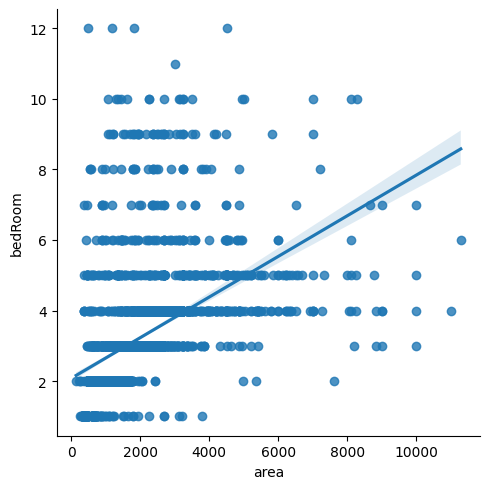

In [206]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [211]:
df['area_room_ratio']=df['area']/df['bedRoom']
# new column will help in understanding the concentration of the area by its difference to bedroom

In [212]:
(df[df['area_room_ratio'] < 257])['bedRoom'].value_counts()

2.0     55
3.0     41
5.0     28
6.0     18
4.0     16
9.0     15
8.0     12
7.0      8
10.0     7
12.0     3
1.0      1
Name: bedRoom, dtype: int64

In [208]:
df.head()

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-sector-99-a-gurgaon-450-sq-ft-r1-spid-O66187314,sector 99a,laxmi pareena,0.30,450.0,6667.0,Carpet area: 450 (41.81 sq.m.),2.0,1.0,0,not available,"Sector 99a, Gurgaon, Haryana, India, Sector 99A Gurgaon, Gurgaon, Haryana",12.0,North,Undefined,NaN,"2bhk affordable, ready to shift in sec 99a laxmi pareena sector 99a, gurgaon, haryana, india","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Environment4 out of 5', 'Lifestyle3 out of 5', 'Connectivity3 out of 5', 'Safety3 out of 5']",O66187314,NaN,NaN,450.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartment-flat-for-sale-in-godrej-icon-sector-88-a-gurgaon-1617-sq-ft-spid-S69145532,sector 88a,godrej icon,1.31,1617.0,8101.0,Super Built up area 1617(150.22 sq.m.),2.0,2.0,3+,study room,"Sector 88A Gurgaon, Gurgaon, Haryana",3.0,North-West,Relatively New,"['JMS Crosswalk', ""Saint Paul's School"", 'Indus valley Public School', 'MDS Public School', 'Gurugram University', 'Axis Bank ATM', 'Genesis Hospital', 'Shri Balaji’s Multispeciality Hospital', 'Signature Super Speciality Hospital', 'Health care pharmacy', 'Jadon Pharmacy', 'Harsaru Village Bus Stop', 'Garhi Harsaru Junction', 'Hyatt Regency Gurgaon', 'Essar Petrol Pump']","This lovely 2 bhk apartment/flat in sector 88a gurgaon is available for sale in one of gurgaon's most popular projects, godrej icon. This property faces the north-East direction. The flat is over 1617 sq.Ft. Super built up area and comes with 2 bedroom(s), 2 bathrooms and more than 3 balconies. This flat is situated on the 3rd floor of this 32 floors tall residential building. An added advantage of this 1-5 years old flat is that it is available for immediate possession as the project is already ready to move. The flat comes well built with vitrified flooring options. The flat will offer a modern lifestyle as it is presented with many of the amenities such as swimming pool, shopping centre, club house / community center, fitness centre / gym, park, lift(s), visitor parking, maintenance staff and water softening plant. The housing society ensures a continuous supply of water to your flat from municipal corporation.\n Additional details :Piped gas facility is available in the property.\nThe apartment has borings water supply.\nDaily needs shopping could be done within the society premises to make the stay convinent.\nFull power backup is available.\nThere is also a separate washroom for domestic help.\nThe society has dedicated security guards for every tower.",NaN,NaN,S69145532,1617.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
2,4 Bedroom House for sale in Sector 54 Gurgaon,house,https://www.99acres.com/4-bhk-bedroom-independent-house-villa-for-sale-in-sector-54-gurgaon-160-sq-ft-r6-spid-B59842588,sector 54,independent,3.75,1440.0,26042.0,Plot area 160(14.86 sq.m.),4.0,4.0,3,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",3.0,East,Moderately Old,"['Sector 53-54 metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Paras Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'The Dental Lounge', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca'

In [213]:
df[df['area_room_ratio'] < 100][['area','bedRoom', 'area_room_ratio']]
# 250 square feet area is the 5% quantile of the area / bedroom ratio of average0 houses below 20000 area and houses with bedroom less than 100 will be too small and with many rooms it seems to be outlier

,area,bedRoom,area_room_ratio
21,450.0,5.0,90.000000
224,540.0,8.0,67.500000
474,450.0,5.0,90.000000
568,495.0,12.0,41.250000
714,450.0,7.0,64.285714
733,360.0,7.0,51.428571
954,360.0,4.0,90.000000
1213,436.0,6.0,72.666667
1282,145.0,2.0,72.500000
1453,360.0,4.0,90.000000


In [214]:
df= df[df['area_room_ratio']>100]

In [215]:
outlier_df = df[(df['area_room_ratio'] < 257) & (df['bedRoom'] > 3 )]

In [216]:
outlier_df['bedRoom'] = round(outlier_df['bedRoom']/outlier_df['floorNum'])

<ipython-input-216-332d2ddec8e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['bedRoom'] = round(outlier_df['bedRoom']/outlier_df['floorNum'])


In [217]:
df.update(outlier_df)

<ipython-input-217-763357d6324f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(outlier_df)
<ipython-input-217-763357d6324f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(outlier_df)
<ipython-input-217-763357d6324f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [218]:
df['area_room_ratio'] = df['area']/df['bedRoom']

<ipython-input-218-5c374e3e5624>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [219]:
df['bedRoom'].value_counts()

3.0     1554
2.0     1018
4.0      655
5.0      178
1.0      132
6.0       54
9.0       24
7.0       20
8.0       18
10.0      13
12.0       1
11.0       1
Name: bedRoom, dtype: int64

In [220]:
df[(df['area_room_ratio'] < 257) & (df['bedRoom'] > 4 )]

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,area_room_ratio
235,8 Bedroom House for sale in IMT Manesar,house,https://www.99acres.com/8-bhk-bedroom-independent-house-villa-for-sale-in-imt-manesar-gurgaon-1200-sq-ft-spid-U69966022,sector nearby manesar,independent,0.80,1200.0,6667.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,not available,"IMT Manesar, Gurgaon, Haryana",1.0,NaN,Relatively New,"['Amba Clinic', 'Ragave Clinic', 'Sercare Clinic', 'Om Clinic', 'Ram Clinic', 'Kushi Clinic', 'Promla Clinic', 'Shree Balaji Clinic', 'Rathore Imt Hospital', 'Dental Hospital', 'Nidan Hospital and Trauma Centre', 'Sagar Clinic', 'Dr. J. S. Sarkar Clinic', 'Bangali Clinic', 'Yadav Clinic', 'Prakash Hospital', 'Petrol pump Maitri motors', ""Domino's Pizza""]",Property earning monthly rent of 25000 appx.\nProperty is for those who are looking for investment as well as for residencial purpose. Someone can easily avail loan on property. It's mcd approved.,[],"['Environment4 out of 5', 'Lifestyle4 out of 5', 'Connectivity4.5 out of 5', 'Safety4 out of 5']",U69966022,NaN,1200.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,150.000000
267,5 Bedroom House for sale in Ashok Vihar Phase 2,house,https://www.99acres.com/5-bhk-bedroom-independent-house-villa-for-sale-in-ashok-vihar-phase-2-gurgaon-900-sq-ft-spid-X67903778,sector 3,independent,0.85,900.0,9444.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,not available,"35597., Ashok Vihar Phase 2, Gurgaon, Haryana",1.0,NaN,Undefined,NaN,"5bhk residential house for resale in ashok vihar phase 2, delhi gurgaon expressway 35597.","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Environment3 out of 5', 'Lifestyle4 out of 5', 'Connectivity4.5 out of 5', 'Safety4 out of 5']",X67903778,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,180.000000
321,5 Bedroom House for sale in Bhim Nagar,house,https://www.99acres.com/5-bhk-bedroom-independent-house-villa-for-sale-in-bhim-nagar-gurgaon-67-sq-ft-r2-spid-X61115738,sector 6,"bhim nagar, sector 6",0.85,603.0,14096.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,pooja room,"H.N0- 159, Bhim Nagar, Gurgaon, Haryana",1.0,NaN,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'D.R. Rajnis Gupta Clinic', 'Aryan Hospital', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Ravi Clinic and Health Care Centre', 'Gurgaon Eye Centre', 'Geeta Nursing Home Gurgaon', 'Dr. Sarvejeet Singh', 'Dr. Agya Ram Sharma Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Bindal Clinic', 'Lalit Dental Care', 'GH Gurgaon', 'Chiranjiv Hospital', 'Kharbanda Maternity and Nursing Home', 'M.S Hospital', 'Dentecare - Multispeciality Dental Clinic', 'M Goel Hospital', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Pearl Dental Clinic', 'Jackson Hospital', 'Triveni Hospital Gurgaon', 'My Care Clinic', 'Sarvodya Hospital', 'Taneja Hospital', 'Dr. Ashok Jain', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Dental Health Centre', 'Swastik Maternity and Medical Centre', 'Gupta Hospital Gurgaon', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Dr. Sindhu Clinic', 'Dr. Ajay S. Gupta Clinic', 'Dr. Madan Clinic', 'Dev Man Kathuria Clinic', 'Satyam Hospital Gurgaon', 'Rajiv Memorial Eye Infirmary Jacobpura', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Rang Parivartan', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","Hello all,This is good property where we spent almost 15 years, there is good thing about this 

In [221]:
df = df[~((df['area_room_ratio'] < 257) & (df['bedRoom'] > 4 ))]

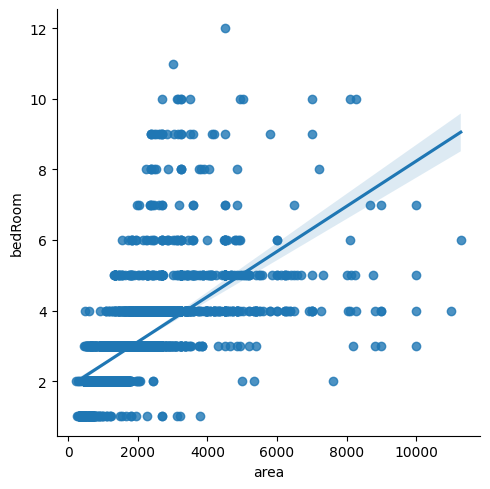

In [222]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [223]:
df.to_csv('/content/gdrive/MyDrive/Project - Real Estate/outlier_treatment.csv',index=False)